In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer

# Load the datasets
train_data_path = r'C:\Users\bhagya sri\Downloads\Assignment_Train.csv'  # Replace with your path
train_df = pd.read_csv(train_data_path)

# Select relevant columns to drop
columns_to_drop = ['DEALER ID', 'APPLICATION LOGIN DATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile']
train_data_filtered = train_df.drop(columns=columns_to_drop)

# Separate features (X) and target (y)
target_variable = 'Application Status'
X = train_data_filtered.drop(columns=[target_variable])
y = train_data_filtered[target_variable]

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [10]:


# Convert column names to strings to avoid mismatches in feature names
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Separate numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# 1. Handle missing values for numerical data (fill with median)
imputer_num = SimpleImputer(strategy='median')
X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])

# 2. Handle missing values for categorical data (fill with most frequent)
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

# 3. One-Hot Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]), index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_cols]), index=X_test.index)

# Get the encoded column names and ensure they are strings
encoded_cat_cols = encoder.get_feature_names_out(cat_cols)

# Combine the encoded categorical features with the numerical features
X_train_final = pd.concat([X_train[num_cols], X_train_encoded], axis=1)
X_test_final = pd.concat([X_test[num_cols], X_test_encoded], axis=1)

# Make sure all columns in X_train_final and X_test_final are strings
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

# 4. Standardize the numerical data
scaler = StandardScaler()
X_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])
X_test_final[num_cols] = scaler.transform(X_test_final[num_cols])

# 5. Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train)

# 6. Perform predictions on the test set
y_pred = model.predict(X_test_final)

# 7. Output the classification report
report = classification_report(y_test, y_pred)
print(report)

C:\Users\bhagya sri\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

    APPROVED       0.92      0.88      0.90      1335
    DECLINED       0.78      0.85      0.81       665

    accuracy                           0.87      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.87      0.87      0.87      2000



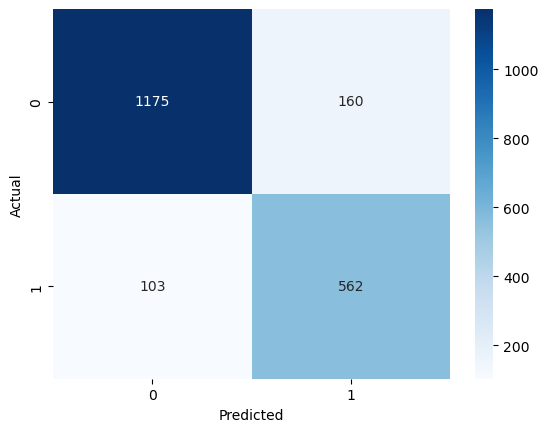

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the test dataset
test_data_path = r'C:\Users\bhagya sri\Downloads\Assignment_Test.csv'  # Replace with your test dataset path
test_df = pd.read_csv(test_data_path)

# Extract the UID column and remove it from the test dataset
UID = test_df['UID']  # Extract the UID column
test_data_filtered = test_df.drop(columns=['UID'])  # Remove the UID column

# Drop the same irrelevant columns as in training
columns_to_drop_test = ['DEALER ID', 'APPLICATION LOGIN DATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile']
test_data_filtered = test_data_filtered.drop(columns=columns_to_drop_test)

# Ensure all column names are strings
test_data_filtered.columns = test_data_filtered.columns.astype(str)

# Handle numerical and categorical columns in the same way as training
num_cols_test = test_data_filtered.select_dtypes(include=['int64', 'float64']).columns
cat_cols_test = test_data_filtered.select_dtypes(include=['object']).columns

# Ensure numerical column names are strings
num_cols_test = num_cols_test.astype(str)
cat_cols_test = cat_cols_test.astype(str)

# 1. Handle missing values for numerical data (fill with median)
test_data_filtered[num_cols_test] = imputer_num.transform(test_data_filtered[num_cols_test])

# 2. Handle missing values for categorical data (fill with most frequent)
test_data_filtered[cat_cols_test] = imputer_cat.transform(test_data_filtered[cat_cols_test])

# 3. One-Hot Encode categorical data
test_encoded = pd.DataFrame(encoder.transform(test_data_filtered[cat_cols_test]), index=test_data_filtered.index)

# Ensure encoded column names are strings
test_encoded.columns = test_encoded.columns.astype(str)

# Combine the encoded categorical features with the numerical features
X_test_final_data = pd.concat([test_data_filtered[num_cols_test], test_encoded], axis=1)

# 4. Standardize the numerical data
X_test_final_data[num_cols_test] = scaler.transform(X_test_final_data[num_cols_test])

# 5. Perform predictions using the trained model
y_test_pred = model.predict(X_test_final_data)

# 6. Prepare the DataFrame with 'UID' and 'Prediction'
predictions_df = pd.DataFrame({
    'UID': UID,
    'Prediction': y_test_pred
})

# 7. Save the predictions to a CSV file named 'predictions.csv'
predictions_df.to_csv(r'C:\Users\bhagya sri\OneDrive\Desktop\predictions.csv', index=False)

print("Predictions have been saved to predictions.csv")


Predictions have been saved to predictions.csv
